In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import plotly.graph_objects as go

# HODP colors
monochrome_colors = ['#251616', '#760000', '#C63F3F', '#E28073', '#F1D3CF']
primary_colors = ['#C63F3F', '#F4B436', '#83BFCC', '#455574', '#E2DDDB']

# HODP template
theme_hodp = go.layout.Template(
    layout=go.Layout(
        title = {'font':{'size':24, 'family':"Helvetica", 'color':monochrome_colors[0]}, 'pad':{'t':100, 'r':0, 'b':0, 'l':0}},
        font = {'size':18, 'family':'Helvetica', 'color':'#717171'},
        xaxis = {'ticks': "outside",
                'tickfont': {'size': 14, 'family':"Helvetica"},
                'showticksuffix': 'all',
                'showtickprefix': 'last',
                'showline': True,
                'title':{'font':{'size':18, 'family':'Helvetica'}, 'standoff':20},
                'automargin': True
                },
        yaxis = {'ticks': "outside",
                'tickfont': {'size': 14, 'family':"Helvetica"},
                'showticksuffix': 'all',
                'showtickprefix': 'last',
                'title':{'font':{'size':18, 'family':'Helvetica'}, 'standoff':20},
                'showline': True,
                'automargin': True
                },
        legend = {'bgcolor':'rgba(0,0,0,0)', 
                'title':{'font':{'size':18, 'family':"Helvetica", 'color':monochrome_colors[0]}}, 
                'font':{'size':14, 'family':"Helvetica"}, 
                'yanchor':'bottom'
                },
        colorscale = {'diverging':monochrome_colors},
        coloraxis = {'autocolorscale':True, 
                'cauto':True, 
                'colorbar':{'tickfont':{'size':14,'family':'Helvetica'}, 'title':{'font':{'size':18, 'family':'Helvetica'}}},
                }
    )
)

In [ ]:
# Terminal commands
# pip install xlrd
# pip install openpyxl
# pip install autocorrect
# pip install wordcloud

In [ ]:
Oct2019 = pd.read_excel("Oct2019.xlsx")
Oct2021 = pd.read_excel("Oct2021.xlsx")

In [ ]:
Oct2019 = Oct2019.drop(columns=['Source Channel', 'Surveyor', 'Guest Email Address'])
Oct2021 = Oct2021.drop(columns=['Source Channel', 'Surveyor', 'Guest Email Address'])

In [ ]:
numberHouses2019 = Oct2019.nunique()["Location"]
houseFrequency2019 = Oct2019["Location"].value_counts()
numberHouses2021 = Oct2021.nunique()["Location"]
houseFrequency2021 = Oct2021["Location"].value_counts()

In [ ]:
houseNames = ["Annenberg", "Quincy", "Cabot", "Lowell", "Dunster", "Currier", "Mather", "Winthrop", "Pforzheimer", "Eliot", "Leverett", "Kirkland", "Adams", "Flyby"]

In [ ]:
# sns.barplot(x = houseFrequency2019, y = houseNames)
# plt.tight_layout()
# plt.show()
fig = go.Figure([go.Bar(x=houseNames, y=houseFrequency2019)])
fig.update_layout(
    title="Feedback Amount by House 2019", 
    xaxis={'title':{'text':'House'}}, 
    yaxis={'title':{'text':'Count'}}, 
    template=theme_hodp
)
fig.show()
fig = go.Figure([go.Bar(x=houseNames, y=houseFrequency2021)])
fig.update_layout(
    title="Feedback Amount by House 2021", 
    xaxis={'title':{'text':'House'}}, 
    yaxis={'title':{'text':'Count'}}, 
    template=theme_hodp
)
fig.show()
fig = go.Figure(data=[
    go.Bar(name='2019', x=houseNames, y=houseFrequency2019, marker_color=primary_colors[0]),
    go.Bar(name='2021', x=houseNames, y=houseFrequency2021, marker_color=primary_colors[3])
])
fig.update_layout(
    title="Feedback Amount by House", 
    xaxis={'title':{'text':'House'}}, 
    yaxis={'title':{'text':'Count'}}, 
    template=theme_hodp
)
fig.show()

In [ ]:
# Remove last 8 characters of each string entry in the captured column

length2019 = Oct2019.shape[0]
for i in range(length2019):
    Oct2019["Captured"][i] = Oct2019["Captured"][i][0:-8]
length2021 = Oct2021.shape[0]
for i in range(length2021):
    Oct2021["Captured"][i] = Oct2021["Captured"][i][0:-8]
for i in range(length2019):
    Oct2019["Guest Mobile Number"][i] = Oct2019["Guest Mobile Number"][i] - 1e10
for i in range(length2021):
    Oct2021["Guest Mobile Number"][i] = Oct2021["Guest Mobile Number"][i] - 1e10

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/sit

In [ ]:
# Now convert the phone numbers to a string
Oct2019["Guest Mobile Number"] = Oct2019["Guest Mobile Number"].apply(str)
Oct2021["Guest Mobile Number"] = Oct2021["Guest Mobile Number"].apply(str)
Oct2019["Captured"] = pd.to_datetime(Oct2019["Captured"])
Oct2021["Captured"] = pd.to_datetime(Oct2021["Captured"])

In [ ]:
#Sentiment Analysis! 

#Insert sentiment analysis value for each comment into a new column
sia = SentimentIntensityAnalyzer()
Oct2019["neg"] = np.zeros(length2019)
Oct2019["neu"] = np.zeros(length2019)
Oct2019["pos"] = np.zeros(length2019)
Oct2019["compound"] = np.zeros(length2019)

for i in range(length2019):
    dictionaryResult = sia.polarity_scores(Oct2019["Comment"][i])
    Oct2019["neg"][i] = dictionaryResult["neg"]
    Oct2019["neu"][i] = dictionaryResult["neu"]
    Oct2019["pos"][i] = dictionaryResult["pos"]
    Oct2019["compound"][i] = dictionaryResult["compound"]

sia = SentimentIntensityAnalyzer()
Oct2021["neg"] = np.zeros(length2021)
Oct2021["neu"] = np.zeros(length2021)
Oct2021["pos"] = np.zeros(length2021)
Oct2021["compound"] = np.zeros(length2021)

for i in range(length2021):
    dictionaryResult = sia.polarity_scores(Oct2021["Comment"][i])
    Oct2021["neg"][i] = dictionaryResult["neg"]
    Oct2021["neu"][i] = dictionaryResult["neu"]
    Oct2021["pos"][i] = dictionaryResult["pos"]
    Oct2021["compound"][i] = dictionaryResult["compound"]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/s

In [ ]:
fig = go.Figure(data=[go.Histogram(x=Oct2019["compound"], marker_color=primary_colors[0])])
fig.update_layout(
    title="Distribution of 2019 Feedback Sentiment", 
    xaxis={'title':{'text':'Sentiment Score'}}, 
    yaxis={'title':{'text':'Count'}}, 
    template=theme_hodp
)
fig.show()

fig = go.Figure(data=[go.Histogram(x=Oct2021["compound"], marker_color=primary_colors[0])])
fig.update_layout(
    title="Distribution of 2021 Feedback Sentiment", 
    xaxis={'title':{'text':'Sentiment Score'}}, 
    yaxis={'title':{'text':'Count'}}, 
    template=theme_hodp
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Histogram(x=Oct2019["compound"], name = "2019", marker_color=primary_colors[0]))
fig.add_trace(go.Histogram(x=Oct2021["compound"], name = "2021", marker_color=primary_colors[3]))
fig.update_layout(
    title="Sentiment Before and After", 
    xaxis={'title':{'text':'Sentiment Score'}}, 
    yaxis={'title':{'text':'Count'}}, 
    template=theme_hodp
)
fig.update_layout(barmode='stack')
fig.show()

In [ ]:
# Calculate average compound scores for each house
Houses2019Sentiment = Oct2019.groupby(["Location"]).mean()
Houses2019Sentiment["house"] = Houses2019Sentiment.index
fig = go.Figure([go.Bar(x=Houses2019Sentiment["house"], y=Houses2019Sentiment["compound"])])
fig.update_layout(
    title="Sentiment by House 2019", 
    xaxis={'title':{'text':'House'}}, 
    yaxis={'title':{'text':'Sentiment Score'}}, 
    template=theme_hodp
)
fig.show()

Houses2021Sentiment = Oct2021.groupby(["Location"]).mean()
Houses2021Sentiment["house"] = Houses2021Sentiment.index
fig = go.Figure([go.Bar(x=Houses2021Sentiment["house"], y=Houses2021Sentiment["compound"])])
fig.update_layout(
    title="Sentiment by House 2021", 
    xaxis={'title':{'text':'House'}}, 
    yaxis={'title':{'text':'Sentiment Score'}}, 
    template=theme_hodp
)
fig.show()

houseNames = Houses2019Sentiment["house"]
houseNames = np.array(Houses2019Sentiment["house"])
houseNames[6] = "Flyby(2019)/Hillel(2021)"

fig = go.Figure(data=[
    go.Bar(name='2019', x=houseNames, y=Houses2019Sentiment["compound"], marker_color=primary_colors[0]),
    go.Bar(name='2021', x=houseNames, y=Houses2021Sentiment["compound"], marker_color=primary_colors[3])
])
fig.update_layout(
    title="Sentiment by House", 
    xaxis={'title':{'text':'House'}}, 
    yaxis={'title':{'text':'Sentiment Score'}}, 
    template=theme_hodp
)
fig.show()

In [ ]:
import datetime
from datetime import datetime
Oct2019["Time"] = np.zeros(length2019)
for i in range(length2019):
    Oct2019["Time"][i] = datetime.strptime(str(Oct2019["Captured"][i]), "%Y-%m-%d %H:%M:%S")
    Oct2019["Time"][i] = Oct2019["Time"][i].strftime("%H:%M:%S")
Oct2021["Time"] = np.zeros(length2021)
for i in range(length2021):
    Oct2021["Time"][i] = datetime.strptime(str(Oct2021["Captured"][i]), "%Y-%m-%d %H:%M:%S")
    Oct2021["Time"][i] = Oct2021["Time"][i].strftime("%H:%M:%S")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site

In [ ]:
# Classify breakfast as 7:30AM to 11:30 AM, lunch as 11:30AM to 4:30PM, dinner as 4:30PM to 7:30 AM
Oct2019["Meal"] = np.zeros(length2019)
for i in range(length2019):
    if (Oct2019["Time"][i] <= "07:30:00"):
        Oct2019["Meal"][i] = "Dinner"
    elif (Oct2019["Time"][i] > "07:30:00") and (Oct2019["Time"][i] <= "11:30:00"):
        Oct2019["Meal"][i] = "Breakfast"
    elif (Oct2019["Time"][i] > "11:30:00") and (Oct2019["Time"][i] <= "16:30:00"):
        Oct2019["Meal"][i] = "Lunch"
    else:
        Oct2019["Meal"][i] = "Dinner"

Oct2021["Meal"] = np.zeros(length2021)
for i in range(length2021):
    if (Oct2021["Time"][i] <= "07:30:00"):
        Oct2021["Meal"][i] = "Dinner"
    elif (Oct2021["Time"][i] > "07:30:00") and (Oct2021["Time"][i] <= "11:30:00"):
        Oct2021["Meal"][i] = "Breakfast"
    elif (Oct2021["Time"][i] > "11:30:00") and (Oct2021["Time"][i] <= "16:30:00"):
        Oct2021["Meal"][i] = "Lunch"
    else:
        Oct2021["Meal"][i] = "Dinner"

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/sit

In [ ]:
# Histogram of meals
numberMeals2019 = Oct2019.nunique()["Meal"]
mealFrequency2019 = Oct2019["Meal"].value_counts()
print(mealFrequency2019)

numberMeals2021 = Oct2021.nunique()["Meal"]
mealFrequency2021 = Oct2021["Meal"].value_counts()
print(mealFrequency2021)

Dinner       206
Lunch        191
Breakfast     47
Name: Meal, dtype: int64
Dinner       178
Lunch        121
Breakfast     48
Name: Meal, dtype: int64


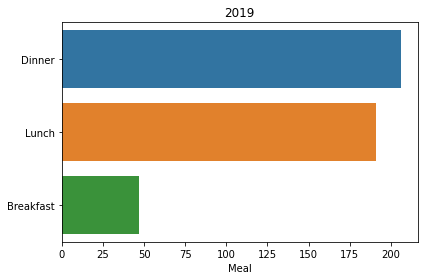

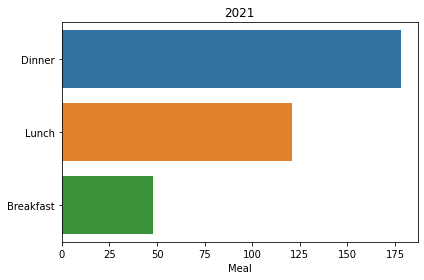

In [ ]:
mealNames = ["Dinner", "Lunch", "Breakfast"]
sns.barplot(x = mealFrequency2019, y = mealNames)
plt.title("2019")
plt.tight_layout()
plt.show()

mealNames = ["Dinner", "Lunch", "Breakfast"]
sns.barplot(x = mealFrequency2021, y = mealNames)
plt.title("2021")
plt.tight_layout()
plt.show()

fig = go.Figure(data=[
    go.Bar(name='2019', x=mealNames, y=mealFrequency2019, marker_color=primary_colors[0]),
    go.Bar(name='2021', x=mealNames, y=mealFrequency2021, marker_color=primary_colors[4])
])
fig.update_layout(
    title="Feedback Amount by Meal", 
    xaxis={'title':{'text':'Meal'}}, 
    yaxis={'title':{'text':'Count'}}, 
    template=theme_hodp
)
fig.show()

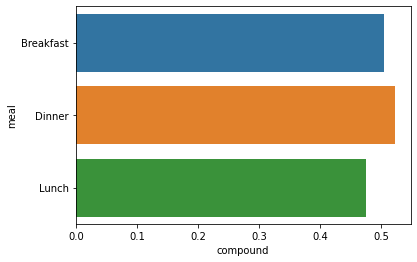

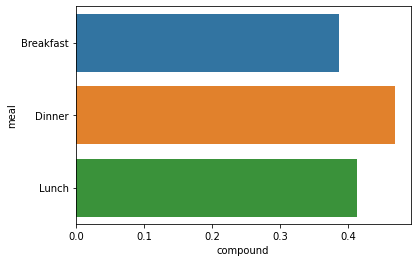

In [ ]:
# Calculate average compound scores for each meal
Meals2019Sentiment = Oct2019.groupby(["Meal"]).mean()
Meals2019Sentiment["meal"] = Meals2019Sentiment.index
sns.barplot(data = Meals2019Sentiment, y = "meal", x = "compound")
plt.show()

Meals2021Sentiment = Oct2021.groupby(["Meal"]).mean()
Meals2021Sentiment["meal"] = Meals2021Sentiment.index
sns.barplot(data = Meals2021Sentiment, y = "meal", x = "compound")
plt.show()

fig = go.Figure(data=[
    go.Bar(name='2019', x=Meals2019Sentiment["meal"], y=Meals2019Sentiment["compound"], marker_color=primary_colors[0]),
    go.Bar(name='2021', x=Meals2021Sentiment["meal"], y=Meals2021Sentiment["compound"], marker_color=primary_colors[4])
])
fig.update_layout(
    title="Sentiment by Meal", 
    xaxis={'title':{'text':'Meal'}}, 
    yaxis={'title':{'text':'Sentiment Score'}}, 
    template=theme_hodp
)
fig.show()

In [ ]:
#Bag of words! Finding which words are the most used in the comments 
text = ""

for i in range(Oct2019.shape[0]):
    text += Oct2019["Comment"][i].lower()
    text += " "
for i in range(Oct2021.shape[0]):
    text += Oct2021["Comment"][i].lower()
    text += " "
import re
text = re.sub('[^A-Za-z]', ' ', text)
text

'house food was so good today  i am wondering if it would be possible to cook the pasta for a minute or two less when you have it  it tends to be a bit well done sad that grapefruit juice is gone but everything else is lovely dinner was great  i loved the variety  the beijing tofu  and the pizza sandwiches  hi  the cookies at community night last year were delicious  are they going to make an appearance this year  thank you  hi  excellent lunch today  i was wondering if we could get eggplant parmesan or vegetable lasagna more often  they are my favorites served by huds  also  if grapes are possible  that would be great too  thanks so much  teriyaki tofu was really good today  it was so flavorful and crispy    please replace the balsamic vinaigrette at the salad bar   i love the roasted broccoli in the salad bar   please neve would love the chocolate muffins to come back during breakfast  grilled cheeses have been basically uncooked lately   no browning on bread and cheese unmelted we n

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

tokenizedText = word_tokenize(text)

nltk.download('stopwords')
from nltk.corpus import stopwords 

for word in tokenizedText:
    if word in stopwords.words('english'):
        tokenizedText.remove(word)
for word in tokenizedText:
    if len(word) <= 2:
        tokenizedText.remove(word)
from autocorrect import spell
# tokenizedText[i] = stemmer.stem(spell(tokenizedText[i]))
finalText = " ".join(tokenizedText)
from nltk.probability import FreqDist
fdist = FreqDist(tokenizedText)
fdist.most_common(20)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('the', 269),
 ('today', 145),
 ('please', 136),
 ('great', 117),
 ('dinner', 110),
 ('good', 106),
 ('love', 105),
 ('lunch', 95),
 ('thank', 92),
 ('back', 87),
 ('would', 78),
 ('chicken', 65),
 ('really', 57),
 ('could', 56),
 ('get', 56),
 ('amazing', 55),
 ('bring', 54),
 ('have', 54),
 ('thanks', 52),
 ('breakfast', 52)]

In [ ]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

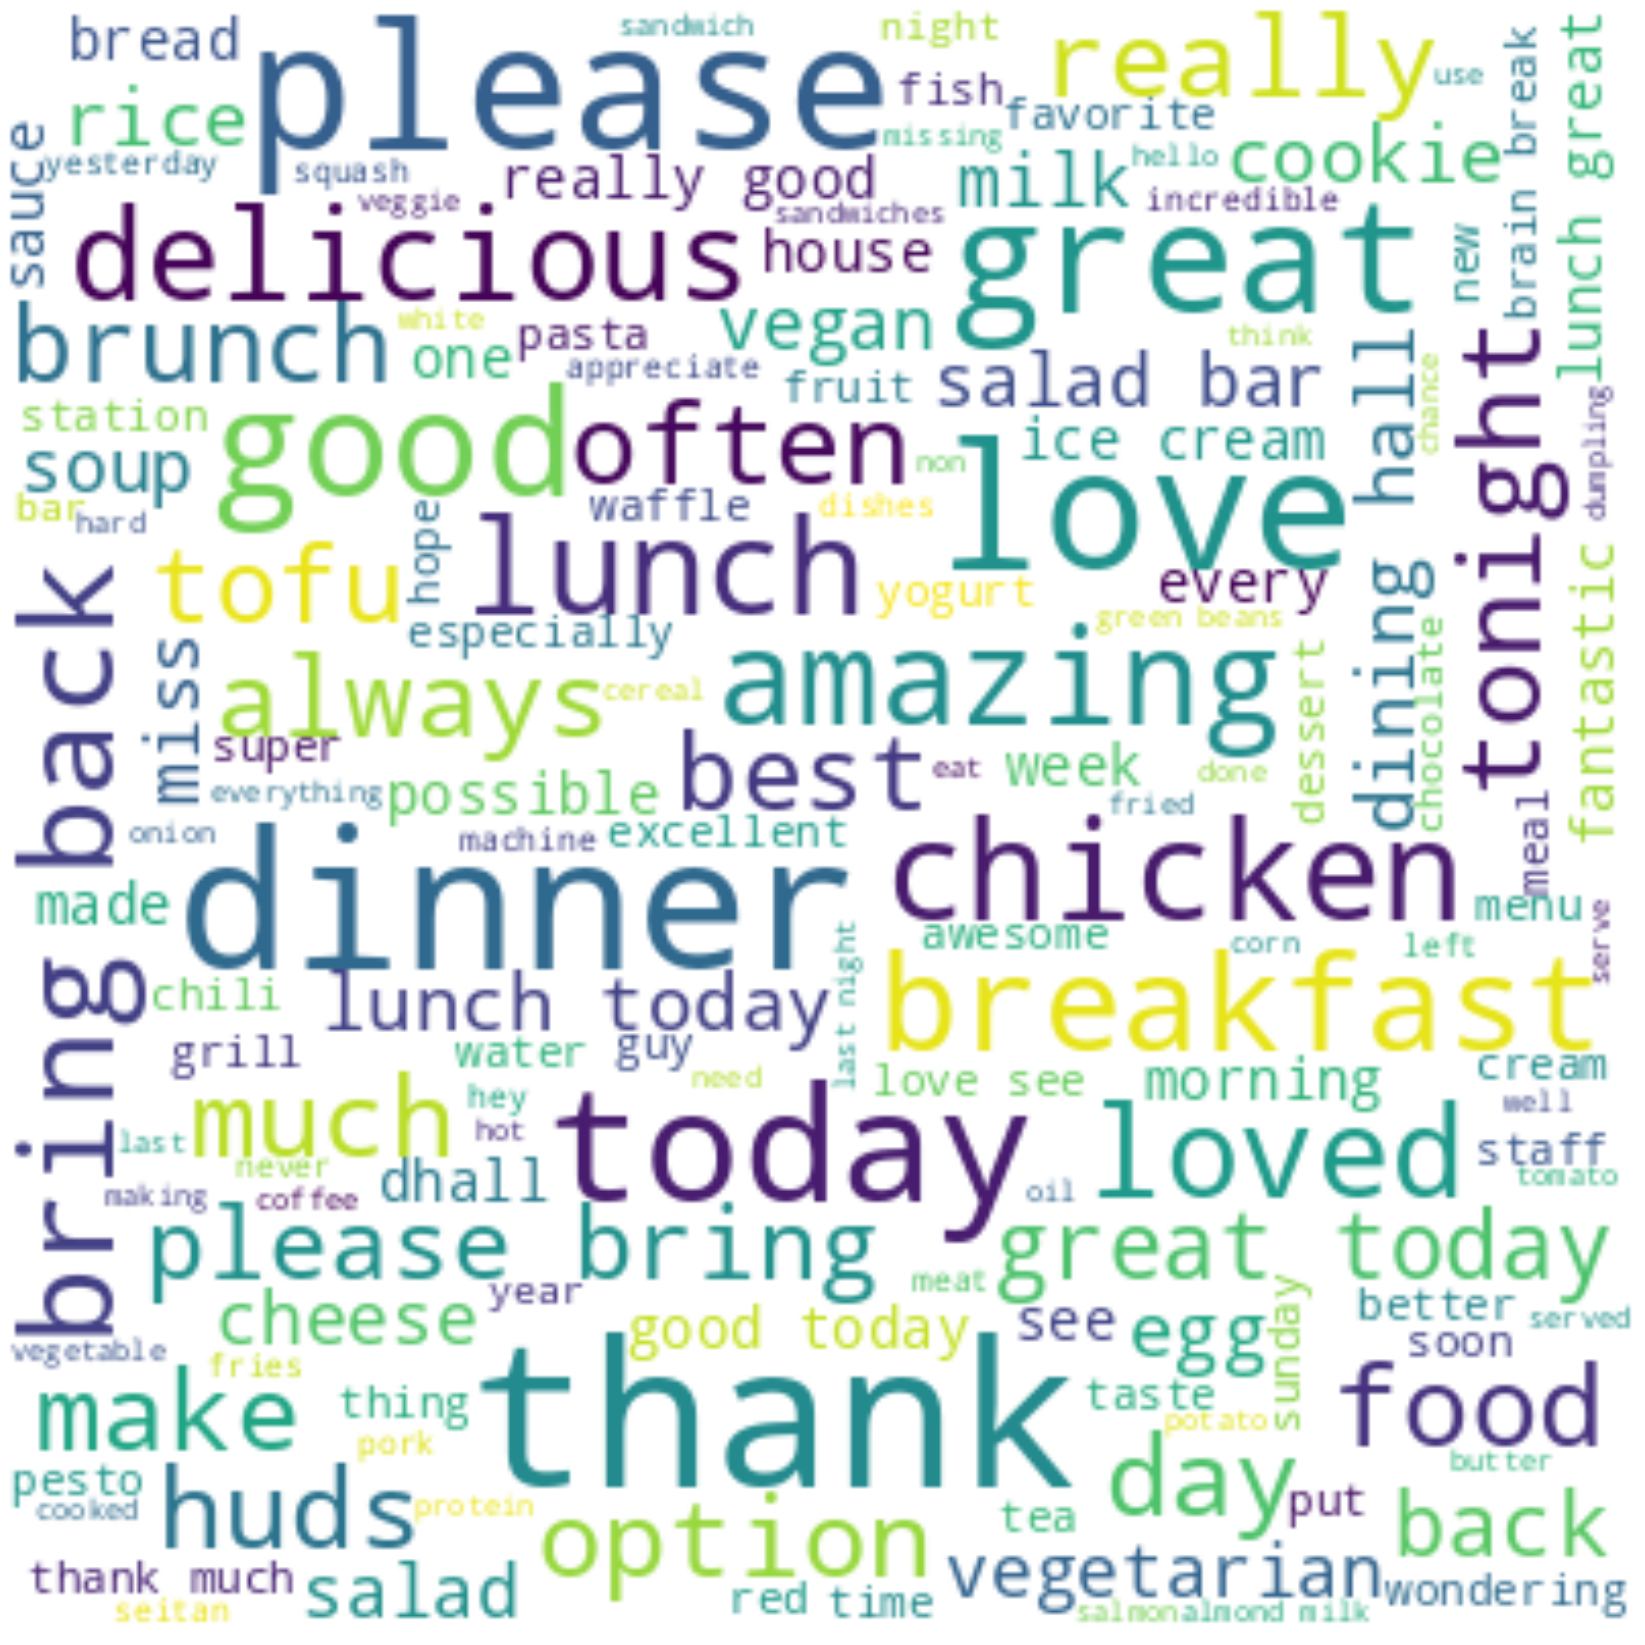

In [ ]:
wordcloud = WordCloud(max_font_size=50, width = 400, height = 400, max_words=150, background_color="white").generate(finalText)
plt.figure(figsize=(30,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file('Wordcloud.png')

In [ ]:
# Extract area code from phone number
Oct2019["Area Code"] = np.zeros(length2019)
for i in range(length2019):
    Oct2019["Area Code"][i] = Oct2019["Guest Mobile Number"][i][0:3]
Oct2021["Area Code"] = np.zeros(length2021)
for i in range(length2021):
    Oct2021["Area Code"][i] = Oct2021["Guest Mobile Number"][i][0:3]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
states = pd.read_csv("us-area-code-cities.csv")
states = states.drop_duplicates(subset=['201'])
states = states.drop(columns = ['Bayonne', 'US', '40.66871', '-74.11431'])
states = states.rename(columns={'201': 'Area Code', 'New Jersey': 'State'})
states = states.set_index("Area Code")
Oct2019["State"] = np.zeros(length2019)
Oct2021["State"] = np.zeros(length2021)
for i in range(length2019):
    areaCode = Oct2019["Area Code"][i]
    areaCode = str(areaCode)
    state = states.loc(areaCode, "State")
    Oct2019["State"][i] = state
for i in range(length2021):
    areaCode = Oct2021["Area Code"][i]
    areaCode = str(areaCode)
    state = states.loc(areaCode, "State")
    Oct2021["State"][i] = state
areaCodeFrequency2019 = Oct2019["State"].value_counts()
areaCodeFrequency2019
areaCodeFrequency2021 = Oct2021["State"].value_counts()
areaCodeFrequency2021
# for i in range(length2019):
    # Oct2019["Area Code"][i]

TypeError: __call__() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
states

,State
Area Code,
201,New Jersey
202,District of Columbia
203,Connecticut
205,Alabama
206,Washington
...,...
980,North Carolina
984,North Carolina
985,Louisiana


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9ae16cd8-53b7-47c5-8e82-06c21efe561b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>